# Minimal example with TensorFlow 2.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation

In [3]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10,10, (observations,1))
inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=inputs, targets=targets)

For each project you work, you will have a dataset, so far we are already used to .xlxs or .csv, however, tensorflow doesn't work well with these formats. We need a format that can store the information in tensors. One solution is .npz files, which is numpy's file type that enables one to save ndarrays. Since tensors can be represented as n-dimensional arrays, when we read a npz file, the data is already organised in the desired way.
so under deep learning with tensorflow our data moves in the following way
data -> preprocess -> save in .npz

## Solving with TensorFlow

## Reminder of our theoritical framework
1- Data  
2- Model   
3- Objective function   
4- Optimization algorithm   

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error') # objective function and optimization algorithm
#NB: when using high level packages that require a string, you'd want to check what yu can actually include as a string
# in this case we can go online and check tf.kera optimizers

The following is another way we could have defined our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

In [10]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)
# verbose=0, stands for 'silent' or no output about the training is displayed
# verbose=1, stands for progress bar
# the cleanest form about the training can be gotten when verbose=2 i.e one line per epoch

Epoch 1/100
32/32 - 0s - loss: 0.3270
Epoch 2/100
32/32 - 0s - loss: 0.3287
Epoch 3/100
32/32 - 0s - loss: 0.3303
Epoch 4/100
32/32 - 0s - loss: 0.3320
Epoch 5/100
32/32 - 0s - loss: 0.3336
Epoch 6/100
32/32 - 0s - loss: 0.3294
Epoch 7/100
32/32 - 0s - loss: 0.3291
Epoch 8/100
32/32 - 0s - loss: 0.3250
Epoch 9/100
32/32 - 0s - loss: 0.3331
Epoch 10/100
32/32 - 0s - loss: 0.3305
Epoch 11/100
32/32 - 0s - loss: 0.3281
Epoch 12/100
32/32 - 0s - loss: 0.3265
Epoch 13/100
32/32 - 0s - loss: 0.3286
Epoch 14/100
32/32 - 0s - loss: 0.3318
Epoch 15/100
32/32 - 0s - loss: 0.3299
Epoch 16/100
32/32 - 0s - loss: 0.3245
Epoch 17/100
32/32 - 0s - loss: 0.3280
Epoch 18/100
32/32 - 0s - loss: 0.3354
Epoch 19/100
32/32 - 0s - loss: 0.3322
Epoch 20/100
32/32 - 0s - loss: 0.3293
Epoch 21/100
32/32 - 0s - loss: 0.3338
Epoch 22/100
32/32 - 0s - loss: 0.3308
Epoch 23/100
32/32 - 0s - loss: 0.3259
Epoch 24/100
32/32 - 0s - loss: 0.3304
Epoch 25/100
32/32 - 0s - loss: 0.3293
Epoch 26/100
32/32 - 0s - loss: 0.

## Extract the weights and bias

In [11]:
model.layers[0].get_weights()

[array([[ 2.0036929],
        [-2.988419 ]], dtype=float32),
 array([5.0098023], dtype=float32)]

In [12]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0036929],
       [-2.988419 ]], dtype=float32)

In [13]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0098023], dtype=float32)

## Extract the outputs (make predictions)

In [16]:
model.predict_on_batch(training_data['inputs']).round(1)

# model.predict_on_batch(data) calculates the outputs given inputs

array([[ 19.6],
       [ 40. ],
       [-30.7],
       [  2.3],
       [ 25.3],
       [ 22. ],
       [  0.6],
       [ 10.8],
       [ 42. ],
       [ 12.1],
       [  9.5],
       [-22.4],
       [ -0.6],
       [  2.6],
       [ 36.7],
       [ -5.9],
       [-17.5],
       [-17.3],
       [-15.8],
       [ 25.3],
       [ 26.1],
       [  5. ],
       [  3.4],
       [ -4.4],
       [ -9. ],
       [-30.2],
       [-14. ],
       [ 14.2],
       [ 28.1],
       [ -6.1],
       [-20.1],
       [ -8.2],
       [ -8. ],
       [ -2.8],
       [-16.7],
       [ 38.6],
       [-14.3],
       [ 38.9],
       [  8.6],
       [  6.7],
       [ 19.1],
       [ 15.7],
       [ 36.9],
       [-17.6],
       [ 23.3],
       [ 16.3],
       [-29.8],
       [  9.2],
       [ 35.5],
       [ 13.1],
       [ -2.8],
       [-11.7],
       [ -5.2],
       [ 29.4],
       [ 29.4],
       [  0.8],
       [ 35.4],
       [ 41.3],
       [  0.2],
       [ 23.3],
       [-29.1],
       [  3.4],
       [

In [17]:
training_data['targets'].round(1)

array([[ 20. ],
       [ 40.5],
       [-30.1],
       [  3. ],
       [ 25.2],
       [ 22.4],
       [  1. ],
       [ 10.5],
       [ 42.2],
       [ 12.9],
       [ 10.2],
       [-22.1],
       [  0.2],
       [  2.4],
       [ 37.4],
       [ -6.2],
       [-17.3],
       [-17.6],
       [-15.4],
       [ 24.6],
       [ 26.5],
       [  4.5],
       [  4.4],
       [ -4.5],
       [ -9.8],
       [-30.1],
       [-13.2],
       [ 14.5],
       [ 28.9],
       [ -6.7],
       [-20.5],
       [ -9.2],
       [ -8. ],
       [ -2.4],
       [-16.1],
       [ 39.1],
       [-13.8],
       [ 39.2],
       [  8.7],
       [  7.1],
       [ 19.1],
       [ 16.5],
       [ 37.9],
       [-17.6],
       [ 22.7],
       [ 17.3],
       [-29.5],
       [  8.4],
       [ 35.7],
       [ 13.8],
       [ -2.1],
       [-12. ],
       [ -5. ],
       [ 29.9],
       [ 29.7],
       [  1.3],
       [ 35.3],
       [ 41.5],
       [  0.6],
       [ 23.3],
       [-29.4],
       [  2.7],
       [

## Plotting the data

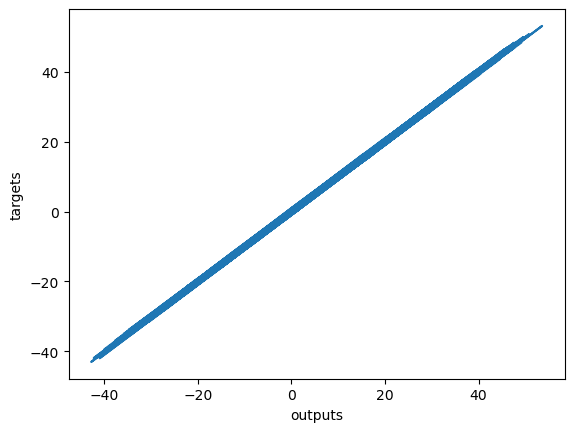

In [18]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()